<a href="https://colab.research.google.com/github/stefelmax/car-price/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%86%D0%B5%D0%BD_%D0%BD%D0%B0_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline


# Предсказание цен машин с Юлы

In [ ]:
# Загружаем файлы
files.upload()
!ls # Выводим содержимое корневой папки

Saving cars_new.csv to cars_new.csv
cars_new.csv  sample_data


In [ ]:
# Считываем csv с помощью pandas
cars = pd.read_csv('cars_new.csv', sep=',')
cars[:5] # Выводим первые 5 машин 

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [ ]:
print(cars.values.shape)

(70119, 10)


In [ ]:
# Создаём словарь поле - его индекс
def create_dict(s):
  ret = {}                          # Создаём пустой словарь
  for _id, name in enumerate(s):    # Проходим по всем парам - id и название
    ret.update({name: _id})         # Добавляем в словарь
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [ ]:
# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры
# и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [ ]:
# Создаём пустую обучающую выборку
x_train = []
y_train = []

# Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y_train.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
# Выводим размеры выборок
print(x_train.shape)
print(y_train.shape)

len_x = int(x_train.shape[0] * 0.1) 

x_train = x_train[len_x:]
y_train = y_train[len_x:]

x_test = x_train[:len_x] #Создаем тестовую выборку из 10%
y_test = y_train[:len_x] #Создаем тестовую выборку из 10%

print(x_train.shape)
print(x_test.shape)


(70119, 3208)
(70119,)
(63108, 3208)
(7011, 3208)


In [ ]:
# Выводим один x_train
print(x_test[0,:20])
print(y_test[-20:])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 250000.  589000.  560000.  465000.  330000.  940000.  145000.   90000.
   20000.  175000.  950000.  645000.  860000.  800000.  215000.  355000.
  115000.   55000. 1195000.  100000.]


In [ ]:
# Выводим y_train
print(y_train[:10])

[700000. 855000. 190000. 499000. 100000. 430000. 320000. 450000. 230000.
 310000.]


In [ ]:
# Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [ ]:
y_train_scaled.shape

(63108,)

In [ ]:
y_test_scaled = y_train_scaled[len_x:]

[700000. 855000. 190000. 499000. 100000. 430000. 320000. 450000. 230000.
 310000.]
[ 0.27565565  0.52322374 -0.53892325 -0.04538427 -0.68267247 -0.155592
 -0.33128549 -0.12364773 -0.47503471 -0.34725763]
[700000. 855000. 190000. 499000. 100000. 430000. 320000. 450000. 230000.
 310000.]
[-0.07573133  0.45134913 -0.63475606 -0.45107651 -0.60281179 -0.12364773
 -0.58683966 -0.55489539 -0.61079786 -0.7226028 ]
(56097,)


In [ ]:
print(x_train.shape[1])

3208


In [ ]:
model_ula = Sequential()
model_ula.add(Dense(1500, activation = 'relu', input_dim = 3208))
model_ula.add(Dropout(0.4))
# model_ula.add(BatchNormalization())
model_ula.add(Dense(750, activation = 'tanh'))
model_ula.add(Dropout(0.4))
model_ula.add(Dense(500, activation = 'tanh'))
model_ula.add(Dense(1, activation = 'linear'))

In [ ]:
# training 1
model_ula.compile(optimizer = Adam(0.001), loss = 'mse')
history_1 = model_ula.fit(x_train, y_train_scaled, epochs = 50, batch_size = 500, validation_split = 0.1, verbose=1)

Epoch 1/50
114/114 [==============================] - 4s 12ms/step - loss: 0.2564 - val_loss: 0.2238
Epoch 2/50
114/114 [==============================] - 1s 9ms/step - loss: 0.1416 - val_loss: 0.1863
Epoch 3/50
114/114 [==============================] - 1s 9ms/step - loss: 0.1179 - val_loss: 0.1689
Epoch 4/50
114/114 [==============================] - 1s 9ms/step - loss: 0.1106 - val_loss: 0.1349
Epoch 5/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0964 - val_loss: 0.1561
Epoch 6/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0988 - val_loss: 0.1281
Epoch 7/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0901 - val_loss: 0.1273
Epoch 8/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0868 - val_loss: 0.1064
Epoch 9/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0903 - val_loss: 0.1140
Epoch 10/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0808 - val_loss: 0.099

In [ ]:
# training 2
model_ula.compile(optimizer = Adam(0.0005), loss = 'mse')
history_2 = model_ula.fit(x_train, y_train_scaled, epochs = 50, batch_size = 500, validation_split = 0.1, verbose=1)

Epoch 1/50
114/114 [==============================] - 2s 12ms/step - loss: 0.0653 - val_loss: 0.0875
Epoch 2/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0585 - val_loss: 0.0780
Epoch 3/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0623 - val_loss: 0.0820
Epoch 4/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0614 - val_loss: 0.0737
Epoch 5/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0637 - val_loss: 0.0833
Epoch 6/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0581 - val_loss: 0.0937
Epoch 7/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0619 - val_loss: 0.0927
Epoch 8/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0584 - val_loss: 0.0716
Epoch 9/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0586 - val_loss: 0.0731
Epoch 10/50
114/114 [==============================] - 1s 9ms/step - loss: 0.0548 - val_loss: 0.076

In [ ]:
model_ula.compile(optimizer = Adam(0.0001), loss = 'mse')
history_3 = model_ula.fit(x_train, y_train_scaled, epochs = 150, batch_size = 750, validation_split = 0.1, verbose=1)


Epoch 1/150
76/76 [==============================] - 1s 14ms/step - loss: 0.0476 - val_loss: 0.0659
Epoch 2/150
76/76 [==============================] - 1s 12ms/step - loss: 0.0446 - val_loss: 0.0651
Epoch 3/150
76/76 [==============================] - 1s 12ms/step - loss: 0.0454 - val_loss: 0.0650
Epoch 4/150
76/76 [==============================] - 1s 12ms/step - loss: 0.0448 - val_loss: 0.0651
Epoch 5/150
76/76 [==============================] - 1s 12ms/step - loss: 0.0450 - val_loss: 0.0671
Epoch 6/150
76/76 [==============================] - 1s 12ms/step - loss: 0.0434 - val_loss: 0.0680
Epoch 7/150
76/76 [==============================] - 1s 12ms/step - loss: 0.0437 - val_loss: 0.0629
Epoch 8/150
76/76 [==============================] - 1s 12ms/step - loss: 0.0414 - val_loss: 0.0627
Epoch 9/150
76/76 [==============================] - 1s 12ms/step - loss: 0.0422 - val_loss: 0.0635
Epoch 10/150
76/76 [==============================] - 1s 12ms/step - loss: 0.0443 - val_loss: 0.0647

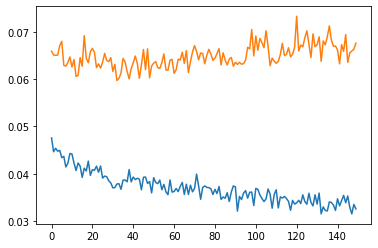

In [ ]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

plt.show()

In [ ]:
predict = model_ula.predict(x_test)

In [ ]:
print(predict)
print(predict.shape)

predict_inverse = y_scaler.inverse_transform(predict).flatten()

print(predict_inverse)
print(predict_inverse.shape)

print(y_test)

[[ 0.21707428]
 [ 0.46900186]
 [-0.5101507 ]
 ...
 [-0.74794495]
 [ 0.6383561 ]
 [-0.68522465]]
(7011, 1)
[663322.75 821052.2  208014.25 ...  59133.53 927083.25  98402.09]
(7011,)
[ 700000.  855000.  190000. ...   55000. 1195000.  100000.]


In [ ]:
delta = y_test - predict_inverse
abs_delta = abs(delta)
mean_delta = sum(abs_delta) / len(abs_delta)
mean_price = sum(y_test) / len(y_test)
loss = round((100 * mean_delta / mean_price), 2)

print('Ошибка равна:', loss, '%')


Ошибка равна: 9.4 %
